List of classifiers to use



1.   Decision Tree
2.   Rule-based
3.   Nearest Neighbors (kNN)
4.   Naive Bayes
5.   Support Vector Machine (SVM)
6.   Neural Networks
7.   Random Forest



IMPORT, CLEAN, AND SPLIT DATASET INTO BALANCED AND UNBLANCED TRAIN AND TEST

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import math

In [4]:
import numpy as np

In [5]:
train_u = pd.read_json('data/more_human_train.json')

In [6]:
test_u = pd.read_json('data/more_human_test.json')

In [7]:
train_b = pd.read_json('data/bal_train.json')

In [8]:
test_b = pd.read_json('data/bal_test.json')

In [9]:
dataframes = [train_u, test_u, train_b, test_b]

for dataframe in dataframes:
  dataframe['bot'] = [1 if val=='bot' else 0 for val in dataframe['bot']]   # convert bot column from string to int (1 for bot, 0 for human)

In [10]:
train_u[train_u['bot']==1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1317 entries, 10798 to 31227
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   verified                      1317 non-null   bool 
 1   geo_enabled                   1317 non-null   bool 
 2   profile_use_background_image  1317 non-null   bool 
 3   default_profile               1317 non-null   bool 
 4   followers_count               1317 non-null   int64
 5   friends_count                 1317 non-null   int64
 6   listed_count                  1317 non-null   int64
 7   favourites_count              1317 non-null   int64
 8   statuses_count                1317 non-null   int64
 9   bot                           1317 non-null   int64
dtypes: bool(4), int64(6)
memory usage: 77.2 KB


In [11]:
test_u[test_u['bot']==1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 14744 to 43204
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   verified                      340 non-null    bool 
 1   geo_enabled                   340 non-null    bool 
 2   profile_use_background_image  340 non-null    bool 
 3   default_profile               340 non-null    bool 
 4   followers_count               340 non-null    int64
 5   friends_count                 340 non-null    int64
 6   listed_count                  340 non-null    int64
 7   favourites_count              340 non-null    int64
 8   statuses_count                340 non-null    int64
 9   bot                           340 non-null    int64
dtypes: bool(4), int64(6)
memory usage: 19.9 KB


In [12]:
test_u.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1950 entries, 5103 to 43204
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   verified                      1950 non-null   bool 
 1   geo_enabled                   1950 non-null   bool 
 2   profile_use_background_image  1950 non-null   bool 
 3   default_profile               1950 non-null   bool 
 4   followers_count               1950 non-null   int64
 5   friends_count                 1950 non-null   int64
 6   listed_count                  1950 non-null   int64
 7   favourites_count              1950 non-null   int64
 8   statuses_count                1950 non-null   int64
 9   bot                           1950 non-null   int64
dtypes: bool(4), int64(6)
memory usage: 114.3 KB


In [13]:
train_u.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7799 entries, 5382 to 1901
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   verified                      7799 non-null   bool 
 1   geo_enabled                   7799 non-null   bool 
 2   profile_use_background_image  7799 non-null   bool 
 3   default_profile               7799 non-null   bool 
 4   followers_count               7799 non-null   int64
 5   friends_count                 7799 non-null   int64
 6   listed_count                  7799 non-null   int64
 7   favourites_count              7799 non-null   int64
 8   statuses_count                7799 non-null   int64
 9   bot                           7799 non-null   int64
dtypes: bool(4), int64(6)
memory usage: 457.0 KB


In [14]:
test_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3237 entries, 620 to 41206
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   verified                      3237 non-null   bool 
 1   geo_enabled                   3237 non-null   bool 
 2   profile_use_background_image  3237 non-null   bool 
 3   default_profile               3237 non-null   bool 
 4   followers_count               3237 non-null   int64
 5   friends_count                 3237 non-null   int64
 6   listed_count                  3237 non-null   int64
 7   favourites_count              3237 non-null   int64
 8   statuses_count                3237 non-null   int64
 9   bot                           3237 non-null   int64
dtypes: bool(4), int64(6)
memory usage: 189.7 KB


In [15]:
train_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12947 entries, 6608 to 7525
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   verified                      12947 non-null  bool 
 1   geo_enabled                   12947 non-null  bool 
 2   profile_use_background_image  12947 non-null  bool 
 3   default_profile               12947 non-null  bool 
 4   followers_count               12947 non-null  int64
 5   friends_count                 12947 non-null  int64
 6   listed_count                  12947 non-null  int64
 7   favourites_count              12947 non-null  int64
 8   statuses_count                12947 non-null  int64
 9   bot                           12947 non-null  int64
dtypes: bool(4), int64(6)
memory usage: 758.6 KB


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_analysis(test, predictions, label):
  print("-----------------------------------")
  print('{} Accuracy score: {}'.format(label, accuracy_score(test, predictions)))
  print('{} Precision score: {}'.format(label, precision_score(test, predictions)))
  print('{} Recall score: {}'.format(label, recall_score(test, predictions)))
  print('{} F1 score: {}'.format(label, f1_score(test, predictions)))
  print("-----------------------------------\n")

CREATE TRAIN AND TEST FOR BALANCED AND UNBALANCED

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# UNBALANCED
x_train_u = train_u.to_numpy()[:,:-1].astype(int)   # all cols of train_u except for class label
x_train_u_scaled = scaler.fit_transform(x_train_u)

y_train_u = train_u.to_numpy()[:,-1].astype(int)    # only class label (last) column of train_u

x_test_u = test_u.to_numpy()[:,:-1].astype(int)   # all cols of test_u except for class label
x_test_u_scaled = scaler.transform(x_test_u)

y_test_u = test_u.to_numpy()[:,-1].astype(int)    # only class label (last) column of test_u

# BALANCED
x_train_b = train_b.to_numpy()[:,:-1].astype(int)   # all cols of train_b except for class label
x_train_b_scaled = scaler.fit_transform(x_train_b)

y_train_b = train_b.to_numpy()[:,-1].astype(int)    # only class label (last) column of train_b

x_test_b = test_b.to_numpy()[:,:-1].astype(int)   # all cols of test_b except for class label
x_test_b_scaled = scaler.transform(x_test_b)

y_test_b = test_b.to_numpy()[:,-1].astype(int)    # only class label (last) column of test_b

DECISION TREE

In [18]:
from sklearn.tree import DecisionTreeClassifier

# UNBALANCED
print('decision tree unbalanced')
tree_u = DecisionTreeClassifier(random_state=17)
tree_u.fit(x_train_u, y_train_u)
tree_pred = tree_u.predict(x_test_u)
print_analysis(y_test_u, tree_pred, 'tree')

# BALANCED
print('decision tree balanced')
tree_b = DecisionTreeClassifier(random_state=17)
tree_b.fit(x_train_b, y_train_b)
tree_pred = tree_u.predict(x_test_b)
print_analysis(y_test_b, tree_pred, 'tree')


decision tree unbalanced
-----------------------------------
tree Accuracy score: 0.9528205128205128
tree Precision score: 0.8542857142857143
tree Recall score: 0.8794117647058823
tree F1 score: 0.8666666666666667
-----------------------------------

decision tree balanced
-----------------------------------
tree Accuracy score: 0.9335804757491505
tree Precision score: 0.9910775566231984
tree Recall score: 0.8772782503037667
tree F1 score: 0.9307122139864649
-----------------------------------



In [19]:
print(tree_b.tree_.max_depth)

22


RANDOM FOREST

In [20]:
from sklearn.ensemble import RandomForestClassifier

# UNBALANCED
print('random forest unbalanced')
forest_u = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
forest_u.fit(x_train_u, y_train_u)
forest_pred = forest_u.predict(x_test_u)
print_analysis(y_test_u, forest_pred, 'random forest')

# BALANCED
print('random forest balanced')
forest_b = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
forest_b.fit(x_train_b, y_train_b)
forest_pred = forest_b.predict(x_test_b)
print_analysis(y_test_b, forest_pred, 'random forest')

random forest unbalanced
-----------------------------------
random forest Accuracy score: 0.9656410256410256
random forest Precision score: 0.9099099099099099
random forest Recall score: 0.8911764705882353
random forest F1 score: 0.9004457652303121
-----------------------------------

random forest balanced
-----------------------------------
random forest Accuracy score: 0.9539697250540624
random forest Precision score: 0.9463327370304114
random forest Recall score: 0.9641555285540705
random forest F1 score: 0.9551609990972013
-----------------------------------



K NEAREST NEIGHBORS

In [21]:
from sklearn.neighbors import KNeighborsClassifier

num_neighbors = 5

# UNBALANCED
print('knn unbalanced')
knn_u = KNeighborsClassifier(n_neighbors=num_neighbors)
# knn_u.fit(x_train_u_scaled, y_train_u)
knn_u.fit(x_train_u, y_train_u)
# knn_pred = knn_u.predict(x_test_u_scaled)
knn_pred = knn_u.predict(x_test_u)
print_analysis(y_test_u, knn_pred, 'knn')


# BALANCED
print('knn balanced')
knn_b = KNeighborsClassifier(n_neighbors=num_neighbors)
# knn_b.fit(x_train_b_scaled, y_train_b)
knn_b.fit(x_train_b, y_train_b)
# knn_pred = knn_u.predict(x_test_b_scaled)
knn_pred = knn_b.predict(x_test_b)
print_analysis(y_test_b, knn_pred, 'knn')

knn unbalanced
-----------------------------------
knn Accuracy score: 0.9523076923076923
knn Precision score: 0.8664688427299704
knn Recall score: 0.8588235294117647
knn F1 score: 0.8626292466765141
-----------------------------------

knn balanced
-----------------------------------
knn Accuracy score: 0.9388322520852641
knn Precision score: 0.9335329341317365
knn Recall score: 0.9471445929526124
knn F1 score: 0.9402895054282269
-----------------------------------



NAIVE BAYES

In [22]:
from sklearn.naive_bayes import MultinomialNB

# UNBALANCED
print('naive bayes unbalanced')
naive_bayes_u = MultinomialNB()
naive_bayes_u.fit(x_train_u, y_train_u)
nb_pred = naive_bayes_u.predict(x_test_u)
print_analysis(y_test_u, nb_pred, 'naive bayes')

# BALANCED
print('naive bayes balanced')
naive_bayes_b = MultinomialNB()
naive_bayes_b.fit(x_train_b, y_train_b)
nb_pred = naive_bayes_b.predict(x_test_b)
print_analysis(y_test_b, nb_pred, 'naive bayes')

naive bayes unbalanced
-----------------------------------
naive bayes Accuracy score: 0.6733333333333333
naive bayes Precision score: 0.3448275862068966
naive bayes Recall score: 0.9705882352941176
naive bayes F1 score: 0.5088666152659985
-----------------------------------

naive bayes balanced
-----------------------------------
naive bayes Accuracy score: 0.751004016064257
naive bayes Precision score: 0.6782682512733447
naive bayes Recall score: 0.9708383961117861
naive bayes F1 score: 0.798600699650175
-----------------------------------



SUPPORT VECTOR MACHINE

In [23]:
from sklearn import svm

# UNBALANCED
print('svm unbalanced')
svm_u = svm.SVC()
svm_u.fit(x_train_u, y_train_u)
svm_pred = svm_u.predict(x_test_u)
print_analysis(y_test_u, svm_pred, 'svm')

# BALANCED
print('svm balanced')
svm_b = svm.SVC()
svm_b.fit(x_train_b, y_train_b)
svm_pred = svm_b.predict(x_test_b)
print_analysis(y_test_b, svm_pred, 'svm')

svm unbalanced
-----------------------------------
svm Accuracy score: 0.8256410256410256
svm Precision score: 0.0
svm Recall score: 0.0
svm F1 score: 0.0
-----------------------------------

svm balanced


/Users/emilymulhall/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-----------------------------------
svm Accuracy score: 0.8841519925857275
svm Precision score: 0.8204740292486132
svm Recall score: 0.988456865127582
svm F1 score: 0.8966657481399836
-----------------------------------



NEURAL NETWORK

In [24]:
from matplotlib import pyplot as plt

def plot_history(history):
  
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

neural net unbalanced
Epoch 1/10
208/208 [==============================] - 1s 3ms/step - loss: 99.0280 - accuracy: 0.8771 - val_loss: 1.5964 - val_accuracy: 0.9171
Epoch 2/10
208/208 [==============================] - 1s 2ms/step - loss: 2.5128 - accuracy: 0.9189 - val_loss: 0.7036 - val_accuracy: 0.9530
Epoch 3/10
208/208 [==============================] - 0s 2ms/step - loss: 1.3436 - accuracy: 0.9358 - val_loss: 0.6251 - val_accuracy: 0.9564
Epoch 4/10
208/208 [==============================] - 0s 2ms/step - loss: 2.9389 - accuracy: 0.9313 - val_loss: 2.5978 - val_accuracy: 0.9479
Epoch 5/10
208/208 [==============================] - 0s 2ms/step - loss: 2.5917 - accuracy: 0.9421 - val_loss: 1.1519 - val_accuracy: 0.9504
Epoch 6/10
208/208 [==============================] - 0s 2ms/step - loss: 2.9407 - accuracy: 0.9287 - val_loss: 2.2190 - val_accuracy: 0.9111
Epoch 7/10
208/208 [==============================] - 0s 2ms/step - loss: 3.9168 - accuracy: 0.9186 - val_loss: 1.1748 - val_

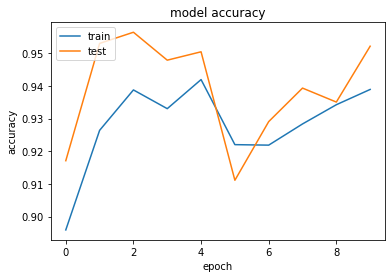

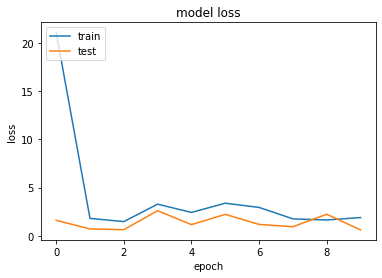

-----------------------------------
neural net Accuracy score: 0.9528205128205128
neural net Precision score: 0.8315508021390374
neural net Recall score: 0.9147058823529411
neural net F1 score: 0.8711484593837535
-----------------------------------

neural net balanced
Epoch 1/10
344/344 [==============================] - 1s 2ms/step - loss: 3.6737 - accuracy: 0.9205 - val_loss: 1.0313 - val_accuracy: 0.9259
Epoch 2/10
344/344 [==============================] - 1s 2ms/step - loss: 8.6677 - accuracy: 0.8970 - val_loss: 2.8315 - val_accuracy: 0.9141
Epoch 3/10
344/344 [==============================] - 1s 2ms/step - loss: 4.6916 - accuracy: 0.9133 - val_loss: 29.7923 - val_accuracy: 0.7905
Epoch 4/10
344/344 [==============================] - 1s 2ms/step - loss: 8.3106 - accuracy: 0.9085 - val_loss: 5.7032 - val_accuracy: 0.9238
Epoch 5/10
344/344 [==============================] - 1s 2ms/step - loss: 3.1171 - accuracy: 0.9298 - val_loss: 3.1622 - val_accuracy: 0.9269
Epoch 6/10
344/344 

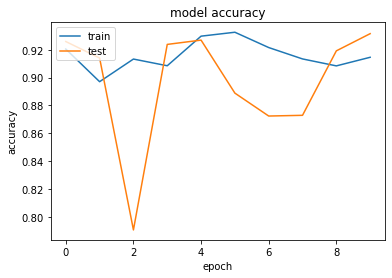

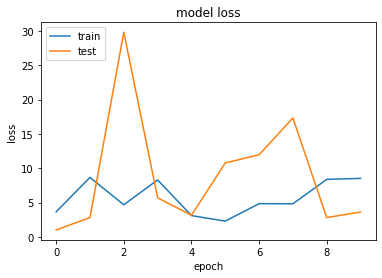

-----------------------------------
neural net Accuracy score: 0.9366697559468644
neural net Precision score: 0.9466831990080595
neural net Recall score: 0.9277035236938032
neural net F1 score: 0.9370972691009513
-----------------------------------



In [25]:
import tensorflow as tf
import numpy as np

num_epochs = 10

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(x_train_u.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# UNBALANCED
print('neural net unbalanced')

history_u = model.fit(x_train_u, y_train_u, epochs=num_epochs, validation_split=0.15)
plot_history(history_u)

probability_model_u = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model_u.predict(x_test_u)
predictions = [np.argmax(pred) for pred in predictions]
print_analysis(y_test_u, predictions, 'neural net')


# BALANCED
print('neural net balanced')

history_b = model.fit(x_train_b, y_train_b, epochs=num_epochs, validation_split=0.15)
plot_history(history_b)

probability_model_b = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model_b.predict(x_test_b)
predictions = [np.argmax(pred) for pred in predictions]
print_analysis(y_test_b, predictions, 'neural net')
